# Challenges 2: IMDB

### Load SQL extension

In [2]:
%load_ext sql

### Establish connection
Store your local credentials in `~/.my.cnf`.

In [3]:
%sql mysql+pymysql:///imdb_ijs?unix_socket=/var/run/mysql/mysql.sock&read_default_file=~/.my.cnf

## The big picture

How many actors are there in the actors table?

In [3]:
%sql SELECT COUNT(1) FROM actors;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


COUNT(1)
817718


How many directors are there in the directors table?


In [4]:
%sql SELECT count(1) FROM directors;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


count(1)
86880


How many movies are there in the movies table?



In [5]:
%sql SELECT count(1) FROM movies;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


count(1)
388269


## Exploring the movies

From what year are the oldest and the newest movies? What are the names of those movies?


In [6]:
%sql SELECT year, name FROM movies ORDER BY year LIMIT 1

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


year,name
1888,Traffic Crossing Leeds Bridge


In [7]:
%sql SELECT year, name FROM movies ORDER BY year DESC LIMIT 1

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


year,name
2008,Harry Potter and the Half-Blood Prince


> Happens to be the only one from 2008 - phew!

What movies have the highest and the lowest ranks?


In [8]:
%%sql
SELECT rank, name
FROM movies
WHERE rank IS NOT NULL
ORDER BY rank
LIMIT 1

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


rank,name
1.0,"Herv, mon ami"


In [9]:
%sql SELECT rank, name FROM movies ORDER BY rank DESC LIMIT 1

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


rank,name
9.9,Napolon Bonaparte


What is the most common movie title?

In [10]:
%%sql
SELECT name, COUNT(1) AS name_count
FROM movies
GROUP BY name
ORDER BY name_count DESC
LIMIT 10;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock


10 rows affected.


name,name_count
"Eurovision Song Contest, The",49
Nationaal songfestival,42
Concours eurovision,36
"""Joulukalenteri""",34
Dansk melodi grand prix,33
Dronningens nytrstale,32
Macbeth,28
Hamlet,27
Carmen,26
"Kennedy Center Honors: A Celebration of the Performing Arts, The",26


## Understanding the database

Are there movies with multiple directors?


In [11]:
%%sql
SELECT movies.name, COUNT(1) AS director_count
FROM movies_directors
LEFT JOIN movies ON movies.id = movie_id
GROUP BY movie_id
ORDER BY director_count DESC
LIMIT 5;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
5 rows affected.


name,director_count
"""Bill, The""",87
"""Bonanza""",80
"""Tales from the Crypt""",73
"""Gunsmoke""",69
"""Hawaii Five-O""",67


What is the movie with the most directors? Why do you think it has so many?

> "The Bill" is a TV series with many directors directing the respective episodes.

On average, how many actors are listed for each movie?


In [12]:
%%sql
WITH
cast_counts AS (
  SELECT movie_id, COUNT(DISTINCT actor_id) AS cast_count
  FROM roles
  GROUP BY movie_id
)
SELECT AVG(cast_count)
FROM cast_counts;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


AVG(cast_count)
11.4287


Are there movies with more than one “genre”?



In [13]:
%%sql
SELECT movie_id, COUNT(1) AS genre_count
FROM movies_genres
GROUP BY movie_id
ORDER BY genre_count DESC
LIMIT 5;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock


5 rows affected.


movie_id,genre_count
122529,11
113329,10
350189,9
349066,9
259095,8


## Looking for specific movies

Can you find the movie called “Pulp Fiction”?
- Who directed it?

In [14]:
%%sql
SELECT movies.*, directors.first_name AS director_first_name, directors.last_name AS director_last_name
FROM movies
LEFT JOIN movies_directors ON movie_id = movies.id
LEFT JOIN directors ON director_id = directors.id
WHERE name LIKE 'Pulp Fiction';

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


index,id,name,year,rank,director_first_name,director_last_name
250101,267038,Pulp Fiction,1994,8.7,Quentin,Tarantino


- Which actors were cast in it?



In [15]:
%%sql
SELECT actors.first_name AS actor_first_name, actors.last_name AS actor_last_name, roles.role AS role
FROM movies
LEFT JOIN roles ON movie_id = movies.id
LEFT JOIN actors ON actor_id = actors.id
WHERE name LIKE 'Pulp Fiction'
ORDER BY actors.last_name, actors.first_name;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock


49 rows affected.


actor_first_name,actor_last_name,role
Carl (I),Allen,Dead Floyd Wilson
Alexis,Arquette,Man #4
Rosanna,Arquette,Jody
Lawrence,Bender,"Long-Hair Yuppie Scum/""Zorro"""
Don,Blakely,Wilson's trainer
Steve,Buscemi,Buddy Holly
Paul,Calderon,Paul
Eric (I),Clark,James Dean
Maria,de Medeiros,Fabienne
Bronagh,Gallagher,Trudi


Can you find the movie called “La Dolce Vita”?


In [16]:
%%sql
SELECT * FROM movies WHERE name LIKE '%Dolce Vita%';

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
5 rows affected.


index,id,name,year,rank
82648,89568,Dolce vita,1989,4.3
82649,89572,"Dolce vita, La",1960,8.0
315312,336621,"Tot, Peppino e la dolce vita",1961,6.4
362995,386637,"""Dolce Vita & Co""",2001,None
362996,386638,"""Dolce Vita""",1995,None


> "La" goes last

In [17]:
%%sql
SELECT * FROM movies WHERE name LIKE 'Dolce Vita, La'

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


index,id,name,year,rank
82649,89572,"Dolce vita, La",1960,8.0


- Who directed it?


In [18]:
%%sql
SELECT movies.*, directors.first_name AS director_first_name, directors.last_name AS director_last_name
FROM movies
LEFT JOIN movies_directors ON movie_id = movies.id
LEFT JOIN directors ON director_id = directors.id
WHERE name LIKE 'Dolce Vita, La';

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


index,id,name,year,rank,director_first_name,director_last_name
82649,89572,"Dolce vita, La",1960,8.0,Federico,Fellini


- Which actors were cast in it?


In [19]:
%%sql
SELECT actors.first_name AS actor_first_name, actors.last_name AS actor_last_name, roles.role AS role
FROM movies
LEFT JOIN roles ON movie_id = movies.id
LEFT JOIN actors ON actor_id = actors.id
WHERE name LIKE 'Dolce Vita, La'
ORDER BY actors.last_name, actors.first_name;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
164 rows affected.


actor_first_name,actor_last_name,role
Giuseppe,Addobbati,
Anouk,Aimée,Maddalena
Conte Brunoro Serego,Aligheri,Young man with mink coat
Federika,André,Tenant in Steiner's house
Armando,Annuale,
Joan,Antequera,Woman at Castle
Juan,Antequero,Spanish Gentleman with eyepat
Gianni,Baghino,
Nadia,Balabine,Reporter
Ignazio,Balsamo,


When was the movie “Titanic” by James Cameron released?
- Hint: there are many movies named “Titanic”. We want the one directed by James Cameron.
- Hint 2: the name “James Cameron” is stored with a weird character on it.



In [20]:
%%sql
SELECT *
FROM movies
WHERE name LIKE 'Titanic';


 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
8 rows affected.


index,id,name,year,rank
312713,333849,Titanic,1915,8.6
312714,333850,Titanic,1943,6.4
312715,333851,Titanic,1953,6.7
312716,333852,Titanic,1984,None
312717,333853,Titanic,1989,None
312718,333854,Titanic,1993,None
312719,333855,Titanic,1996,None
312720,333856,Titanic,1997,6.9


In [21]:
%%sql
SELECT year
FROM movies
LEFT JOIN movies_directors ON movie_id = movies.id
LEFT JOIN directors ON director_id = directors.id
WHERE movies.name LIKE 'Titanic'
AND directors.first_name LIKE '%James%'
AND directors.last_name LIKE '%Cameron%';

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


year
1997


## Actors and directors

Who is the actor that acted more times as “Himself”?


In [22]:
%%sql
SELECT actors.first_name, actors.last_name, COUNT(1) AS role_count
FROM roles
LEFT JOIN actors ON actor_id = actors.id
WHERE role LIKE '%himself%'
GROUP BY actor_id
ORDER BY role_count DESC
LIMIT 25
;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock


25 rows affected.


first_name,last_name,role_count
Adolf,Hitler,263
Bob,Hope,157
The,King Cole Trio,135
Jerry,Lawler,121
Franklin Delano,Roosevelt,119
Jim (III),Ross,116
Vince,McMahon,112
John F.,Kennedy,109
Josip Broz,Tito,108
Winston (I),Churchill,106


What is the most common name for actors? And for directors?



In [23]:
%%sql
WITH
people AS (
  SELECT 'actor' AS type, first_name, COUNT(1) AS count
  FROM actors
  GROUP BY first_name
  UNION
  SELECT 'director', first_name, COUNT(1) AS count
  FROM directors
  GROUP BY first_name
  HAVING count > 1
),
ranked_people AS (
  SELECT type, first_name, count, RANK() OVER (PARTITION BY type ORDER BY count DESC, first_name ASC) AS rank
  FROM people
)
SELECT *
FROM ranked_people
WHERE rank <= 10
ORDER BY type, rank;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
20 rows affected.


type,first_name,count,rank
actor,John,4371,1
actor,Michael,4022,2
actor,David,3854,3
actor,Robert,3415,4
actor,Peter,3231,5
actor,Paul,2973,6
actor,Richard,2403,7
actor,María,2258,8
actor,James,2096,9
actor,Mark,2086,10


## Analysing genders

How many actors are male and how many are female?


In [24]:
%%sql
SELECT gender, COUNT(1) AS count
FROM actors
GROUP BY gender
ORDER BY gender;


 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
2 rows affected.


gender,count
F,304412
M,513306


What percentage of actors are female, and what percentage are male?



In [4]:
%%sql
SELECT gender, COUNT(1) AS count, 100 * COUNT(1) / SUM(COUNT(1)) OVER () AS percentage
FROM actors
GROUP BY gender
ORDER BY gender;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
2 rows affected.


gender,count,percentage
F,304412,37.2270
M,513306,62.7730


## Movies across time

How many of the movies were released after the year 2000?


In [26]:
%%sql
SELECT COUNT(1) AS count
FROM movies
WHERE year > 2000;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


count
46006


How many of the movies were released between the years 1990 and 2000?


In [27]:
%%sql
SELECT COUNT(1) AS count
FROM movies
WHERE year BETWEEN 1990 AND 2000;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


count
91138


Which are the 3 years with the most movies? How many movies were produced in those years?


In [28]:
%%sql
SELECT year, COUNT(1) AS count
FROM movies
GROUP BY year
ORDER BY count DESC
LIMIT 3;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock


3 rows affected.


year,count
2002,12056
2003,11890
2001,11690


What are the top 5 movie genres?


In [29]:
%%sql
SELECT genre, COUNT(1) AS count
FROM movies_genres
GROUP BY genre
ORDER BY count DESC
LIMIT 5;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
5 rows affected.


genre,count
Short,81013
Drama,72877
Comedy,56425
Documentary,41356
Animation,17652


- What are the top 5 movie genres before 1920?


In [30]:
%%sql
SELECT genre, COUNT(1) AS count
FROM movies_genres
JOIN movies ON movie_id = movies.id
WHERE movies.year < 1920
GROUP BY genre
ORDER BY count DESC
LIMIT 5;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
5 rows affected.


genre,count
Short,18559
Comedy,8676
Drama,7692
Documentary,3780
Western,1704


- What is the evolution of the top movie genres across all the decades of the 20th century?


In [31]:
%%sql
WITH
genres_by_decade AS (
  SELECT
    FLOOR(movies.year / 10) * 10 AS decade,
    genre,
    COUNT(1) AS count,
    RANK() OVER (PARTITION BY decade ORDER BY count DESC) AS rank
  FROM movies_genres
  JOIN movies ON movie_id = movies.id
  GROUP BY decade, genre
  ORDER BY decade, rank
)
SELECT decade, genre, count
FROM genres_by_decade
WHERE rank = 1
ORDER BY decade;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
13 rows affected.


decade,genre,count
1880,Short,2
1890,Documentary,1062
1900,Short,3929
1910,Short,13764
1920,Short,5583
1930,Short,5218
1940,Short,4458
1950,Drama,5427
1960,Drama,7234
1970,Drama,8304


In [32]:
%%sql data <<
SELECT FLOOR(year/10)*10 AS decade, genre, COUNT(1) AS count
FROM movies_genres
JOIN movies ON movie_id = movies.id
GROUP BY genre, decade
ORDER BY SUM(COUNT(1)) OVER (PARTITION BY genre) DESC, decade, count DESC;


 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
239 rows affected.
Returning data to local variable data


In [33]:
data

decade,genre,count
1880,Short,2
1890,Short,864
1900,Short,3929
1910,Short,13764
1920,Short,5583
1930,Short,5218
1940,Short,4458
1950,Short,4414
1960,Short,6357
1970,Short,5706


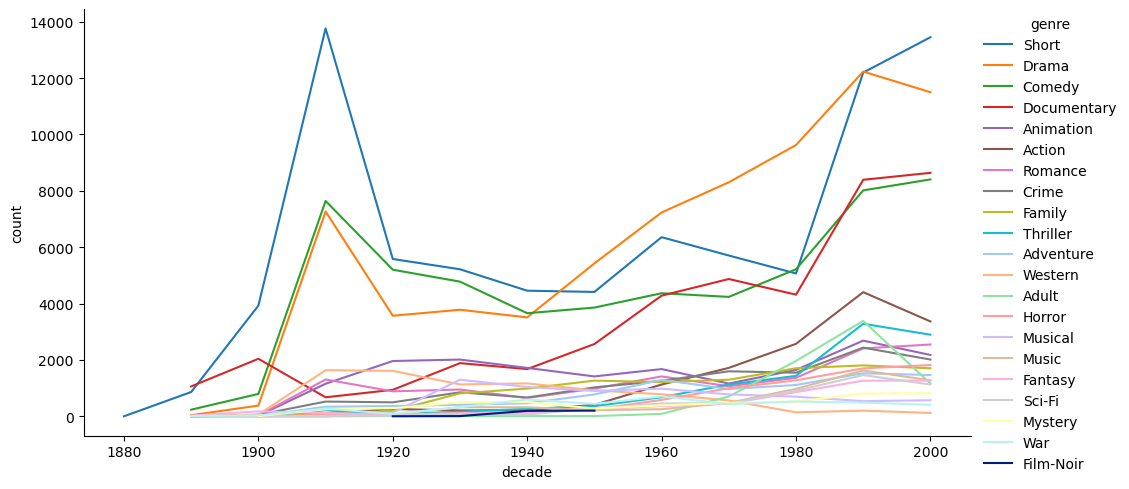

In [34]:
import pandas as pd
import warnings
import seaborn as sns
with warnings.catch_warnings():
  warnings.simplefilter("ignore")
  sns.relplot(
    data=pd.DataFrame(data),
    x='decade',
    y='count',
    hue='genre',
    kind='line',
    aspect=2,
    palette=sns.color_palette('tab10') + sns.color_palette('pastel') + sns.color_palette('dark'));


## Putting it all together: names, genders and time

Has the most common name for actors changed over time?


Without counting the same actor once per role/movie:

In [35]:
%%sql
WITH
actors_by_decade AS (
  SELECT DISTINCT FLOOR(year/10)*10 AS decade, actor_id
  FROM movies
  JOIN roles ON movie_id = movies.id
),
names_by_decade AS (
  SELECT
    decade,
    first_name,
    COUNT(1) AS count,
    RANK() OVER (PARTITION BY decade ORDER BY count DESC) AS rank
  FROM actors_by_decade
  JOIN actors ON actor_id = actors.id
  GROUP BY decade, first_name
  ORDER BY decade, count DESC
)
SELECT *
FROM names_by_decade
WHERE rank = 1;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
14 rows affected.


decade,first_name,count,rank
1890,May,3,1
1900,José,11,1
1900,Harry,11,1
1910,William,175,1
1910,Charles,175,1
1920,Charles,181,1
1930,George,220,1
1940,Maria,230,1
1950,John,373,1
1960,John,555,1


With counting the same actor multiple times per role/movie:

In [36]:
%%sql
WITH
names_by_decade AS (
  SELECT
    FLOOR(year/10)*10 AS decade,
    first_name,
    COUNT(1) AS count,
    RANK() OVER (PARTITION BY decade ORDER BY count DESC) AS rank
  FROM movies
  JOIN roles ON movie_id = movies.id
  JOIN actors ON actor_id = actors.id
  GROUP BY decade, first_name
  ORDER BY decade, count DESC
)
SELECT *
FROM names_by_decade
WHERE rank = 1;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
12 rows affected.


decade,first_name,count,rank
1890,Petr,26,1
1900,Florence,180,1
1910,Harry,1662,1
1920,Charles,1009,1
1930,Harry,2161,1
1940,George,2128,1
1950,John,2027,1
1960,John,1823,1
1970,John,2657,1
1980,John,3855,1


Get the most common actor name for each decade in the XX century.


In [37]:
%%sql
WITH
names_by_decade AS (
  SELECT
    FLOOR(year/10)*10 AS decade,
    first_name,
    COUNT(1) AS count,
    RANK() OVER (PARTITION BY decade ORDER BY count DESC) AS rank
  FROM movies
  JOIN roles ON movie_id = movies.id
  JOIN actors ON actor_id = actors.id
  GROUP BY decade, first_name
  ORDER BY decade, count DESC
)
SELECT *
FROM names_by_decade
WHERE rank = 1 AND decade BETWEEN 1900 AND 1990;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
10 rows affected.


decade,first_name,count,rank
1900,Florence,180,1
1910,Harry,1662,1
1920,Charles,1009,1
1930,Harry,2161,1
1940,George,2128,1
1950,John,2027,1
1960,John,1823,1
1970,John,2657,1
1980,John,3855,1
1990,Michael,5929,1


Re-do the analysis on most common names, split for males and females.


In [38]:
%%sql
WITH
names_by_decade AS (
  SELECT
    FLOOR(year/10)*10 AS decade,
    gender,
    first_name,
    COUNT(1) AS count,
    RANK() OVER (PARTITION BY decade, gender ORDER BY count DESC) AS rank
  FROM movies
  JOIN roles ON movie_id = movies.id
  JOIN actors ON actor_id = actors.id
  GROUP BY decade, first_name
  ORDER BY decade, count DESC
),
top_names_by_decade AS (
  SELECT decade, gender, first_name, count
  FROM names_by_decade
  WHERE rank = 1
  ORDER BY decade, gender
)
SELECT
  decade,
  MIN(IF(gender='F', first_name, NULL)) AS female_name,
  MIN(IF(gender='F', NULL, first_name)) AS male_name
FROM top_names_by_decade
GROUP BY decade
ORDER BY decade;


 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
12 rows affected.


decade,female_name,male_name
1890,Rosemarie,Petr
1900,Florence,Mack
1910,Florence,Harry
1920,Mary,Charles
1930,Dorothy,Harry
1940,Maria,George
1950,María,John
1960,Mária,John
1970,Maria,John
1980,Jean,John


How many movies had a majority of females among their cast?


What percentage of the total movies had a majority female cast?

In [7]:
%%sql
CREATE INDEX IF NOT EXISTS movie_actor ON roles (movie_id, actor_id);

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
0 rows affected.


[]

Counting by actor, not role:

In [5]:
%%sql
WITH
actors_by_movie AS (
  SELECT DISTINCT movie_id, actor_id
  FROM roles
),
gender_stats AS (
  SELECT movie_id, SUM(gender='F') AS female_actors, COUNT(1) AS total_actors
  FROM actors_by_movie
  JOIN actors ON actor_id = actors.id
  GROUP BY movie_id
)
SELECT
  SUM(female_actors > total_actors / 2) AS female_majority_count,
  COUNT(1) AS total_count,
  100 * SUM(female_actors > total_actors / 2) / COUNT(1) AS percentage
FROM gender_stats;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


female_majority_count,total_count,percentage
50666,300252,16.8745


Counting by role, even if played the same actors (doesn't matter):

In [6]:
%%sql
WITH
gender_stats AS (
  SELECT movie_id, SUM(gender='F') AS female_actors, COUNT(1) AS total_actors
  FROM roles
  JOIN actors ON actor_id = actors.id
  GROUP BY movie_id
)
SELECT
  SUM(female_actors > total_actors / 2) AS female_majority_count,
  COUNT(1) AS total_count,
  100 * SUM(female_actors > total_actors / 2) / COUNT(1) AS percentage
FROM gender_stats;

 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
1 rows affected.


female_majority_count,total_count,percentage
50666,300252,16.8745


Which movies had the worst actor to role ratio?

In [42]:
%%sql
WITH
role_actor_count AS (
  SELECT name, year, COUNT(1) AS role_count, COUNT(DISTINCT actor_id) AS actor_count
  FROM movies
  JOIN roles ON movie_id = movies.id
  GROUP BY movie_id
)
SELECT name, year, role_count, actor_count, role_count - actor_count AS difference, role_count / actor_count AS ratio
FROM role_actor_count
ORDER BY ratio DESC
LIMIT 10;


 * mysql+pymysql:///imdb_ijs?read_default_file=~%2F.my.cnf&unix_socket=%2Fvar%2Frun%2Fmysql%2Fmysql.sock
10 rows affected.


name,year,role_count,actor_count,difference,ratio
"""Ground Force"" (1998/I)",1998,13,6,7,2.1667
"Queen and the Queen Mother on the Palace Balcony Responding to the Call of the Populace, The",1898,2,1,1,2.0000
"""Krazy Kat""",1963,4,2,2,2.0000
"""Nero Wolfe Mystery, A""",2001,103,52,51,1.9808
"""Motiv Liebe""",1972,7,4,3,1.7500
"""Fantmas""",1980,140,84,56,1.6667
"""Fargas""",2003,5,3,2,1.6667
"""Late Show, The""",1992,23,14,9,1.6429
"""Ferbac""",1991,3,2,1,1.5000
"""True Life""",1998,3,2,1,1.5000
